<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Selection/blob/main/Feature-Selection-(Univariate%2C%20ROC_AUC%20for%20Classification%20and%20MSE%20for%20Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [ ]:
data=pd.read_csv("/content/train.csv",nrows=20000)

In [ ]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
x=data.drop('TARGET',axis=1)
y=data['TARGET']

In [ ]:
x.shape,y.shape

((20000, 370), (20000,))

In [ ]:
x.dropna(inplace=True)

In [ ]:
y.dropna(inplace=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# **Remove Constant,Quasi Constant and Duplicate Features**

In [ ]:
# Remove Constant and Quasi Constant Features
cf=VarianceThreshold(threshold=0.01)
cf.fit(x_train)
x_train_f=cf.transform(x_train)
x_test_f=cf.transform(x_test)

In [ ]:
x_train_f.shape,x_test_f.shape

((16000, 245), (4000, 245))

In [ ]:
# remove duplicate features
x_train_T=x_train_f.T
x_test_T=x_test_f.T

In [ ]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [ ]:
x_train_T.duplicated().sum()

18

In [ ]:
df=x_train_T.duplicated()

In [ ]:
ftk=[not index for index in df]
x_train_unique=x_train_T[ftk].T
x_test_unique=x_test_T[ftk].T

In [ ]:
x_train_unique.shape,x_test_unique.shape

((16000, 227), (4000, 227))

# **Now calculate ROC_AUC Score**

In [ ]:
roc_auc=[]
for feature in x_train_unique.columns:
  clf=RandomForestClassifier(n_estimators=100,random_state=0)
  clf.fit(x_train_unique[feature].to_frame(),y_train)
  y_pred=clf.predict(x_test_unique[feature].to_frame())
  roc_auc.append(roc_auc_score(y_test,y_pred))


In [ ]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [ ]:
roc_values=pd.Series(roc_auc)
roc_values.index=x_train_unique.columns
roc_values.sort_values(ascending=False,inplace=True)

In [ ]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

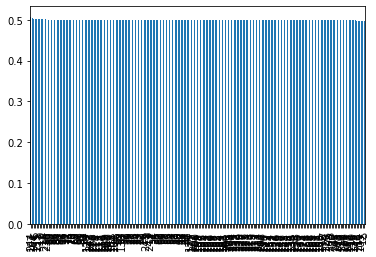

In [ ]:
roc_values.plot.bar()

In [ ]:
 sel=roc_values[roc_values>0.5]
 sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [ ]:
x_train_roc=x_train_unique[sel.index]
x_test_roc=x_test_unique[sel.index]

# **Build the Model**

In [ ]:
def run(x_train,x_test,y_train,y_test):
  clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  print("Accuracy on test set:",accuracy_score(y_test,y_pred))

In [ ]:
%%time
run(x_train_roc,x_test_roc,y_train,y_test)

Accuracy on test set: 0.95275
CPU times: user 4.06 s, sys: 30 ms, total: 4.09 s
Wall time: 2.17 s


In [ ]:
x_train_roc.shape,x_test_roc.shape

((16000, 11), (4000, 11))

In [ ]:
%%time
run(x_train,x_test,y_train,y_test)

Accuracy on test set: 0.9585
CPU times: user 6.01 s, sys: 48 ms, total: 6.05 s
Wall time: 3.29 s


# **Feature Selection using RMSE in Regression**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
boston=load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
x=pd.DataFrame(boston.data,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y=boston.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
mse=[]
for feature in x_train.columns:
  clf=LinearRegression()
  clf.fit(x_train[feature].to_frame(),y_train)
  y_pred=clf.predict(x_test[feature].to_frame())
  mse.append(mean_squared_error(y_test,y_pred))

In [ ]:
mse

[71.0685249908602,
 76.73293911757604,
 68.21896459883429,
 80.39584460898249,
 68.46767297659689,
 47.03304747975518,
 74.16809344173464,
 78.1785332091509,
 72.73024456715193,
 67.68252295579559,
 74.85120949842722,
 73.21530716484799,
 39.81715050474416]

In [ ]:
mse=pd.Series(mse,index=x_train.columns)
mse.sort_values(ascending=False,inplace=True)

In [ ]:
mse

CHAS       80.395845
DIS        78.178533
ZN         76.732939
PTRATIO    74.851209
AGE        74.168093
B          73.215307
RAD        72.730245
CRIM       71.068525
NOX        68.467673
INDUS      68.218965
TAX        67.682523
RM         47.033047
LSTAT      39.817151
dtype: float64

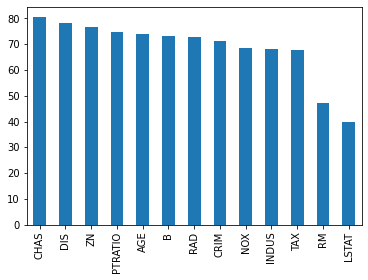

In [ ]:
mse.plot.bar()

In [ ]:
x_train_2=x_train[['RM','LSTAT']]
x_test_2=x_test[['RM','LSTAT']]

In [ ]:
%%time
model=LinearRegression()
model.fit(x_train_2,y_train)
y_pred=model.predict(x_test_2)
print("r2_score:",r2_score(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))
print('SD of house price:',np.std(y))

r2_score: 0.6069792285352371
rmse: 5.72058316020447
SD of house price: 9.188011545278203
CPU times: user 3.89 ms, sys: 2.98 ms, total: 6.87 ms
Wall time: 6.89 ms


In [ ]:
%%time
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("r2_score:",r2_score(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))
print('SD of house price:',np.std(y))

r2_score: 0.6733825506400171
rmse: 5.214975145375423
SD of house price: 9.188011545278203
CPU times: user 5.26 ms, sys: 1 ms, total: 6.26 ms
Wall time: 6.97 ms
